In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation function
from sklearn.metrics import accuracy_score

# Convenience function
from functions import *

# Define the Task
#### Make predictions about a country's life expectancy (L/M/H bands) from a set of metrics for the country.

# Acquire Clean Data

In [2]:
dataset = pd.read_csv("./OC_csv/world_data.csv")

In [3]:
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [4]:
dataset.shape

(194, 17)

In [5]:
dataset.describe()

,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
count,140.000000,193.000000,187.000000,194.000000,194.000000,119.000000,112.00000,149.000000,160.000000,93.000000,169.000000,193.000000,184.000000,1.490000e+02,168.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,24.322185,1.90881,81.573826,38.579375,4.953132,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,1.123605,19122.183694,7.605557,29.269367,17.568245,15.569400,2.04772,19.476814,7.995857,10.261882,2806.613656,31.319236,1.372184,6.304909e+05,444.201818,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,3.880000,0.01820,25.300000,16.600000,0.057800,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.610368,3290.000000,66.050000,49.225000,77.900000,13.450000,0.58675,70.300000,32.775000,0.660000,563.000000,8.200000,1.777500,7.600000e+03,2505.000000,1.982500e+06
50%,5.331034,11000.000000,73.300000,87.900000,94.950000,20.500000,1.25000,90.000000,37.450000,1.400000,1250.000000,17.700000,2.335000,2.400000e+04,2825.000000,8.435000e+06
75%,6.257746,24100.000000,77.500000,97.700000,99.300000,29.000000,2.16500,97.400000,43.125000,4.820000,2710.000000,49.500000,3.842500,1.300000e+05,3200.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,10.70000,100.000000,63.000000,77.600000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


In [6]:
dataset.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [7]:
dataset.isnull().mean().sort_values()

country            0.000000
sanitation         0.000000
water              0.000000
population         0.000000
childmortality     0.005155
income             0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

In [8]:
dataset = dataset.drop(["urbanpopulation", "unemployment", "murder"], axis=1,)

In [9]:
dataset.isnull().mean().sort_values()

country           0.000000
sanitation        0.000000
water             0.000000
population        0.000000
childmortality    0.005155
income            0.005155
lifeexp           0.036082
fertility         0.051546
energy            0.128866
foodsupply        0.134021
inequality        0.175258
literacy          0.231959
hiv               0.231959
happiness         0.278351
dtype: float64

In [10]:
numeric_means = dataset.select_dtypes(exclude=["object"]).mean().to_dict()
for m in numeric_means:
    dataset[m] = dataset[m].fillna(value=numeric_means[m])

In [11]:
dataset.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

# Understanding the Data

In [12]:
dataset.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


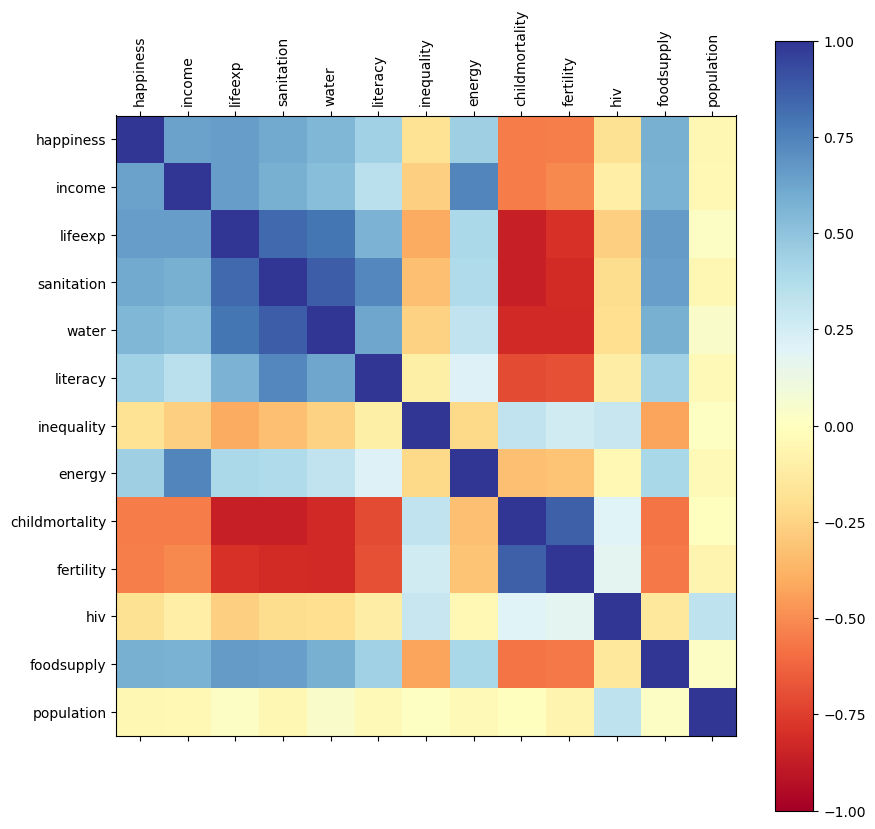

In [13]:
dataset_numeric = dataset.drop("country", axis=1)

correlationMatrix(dataset_numeric)

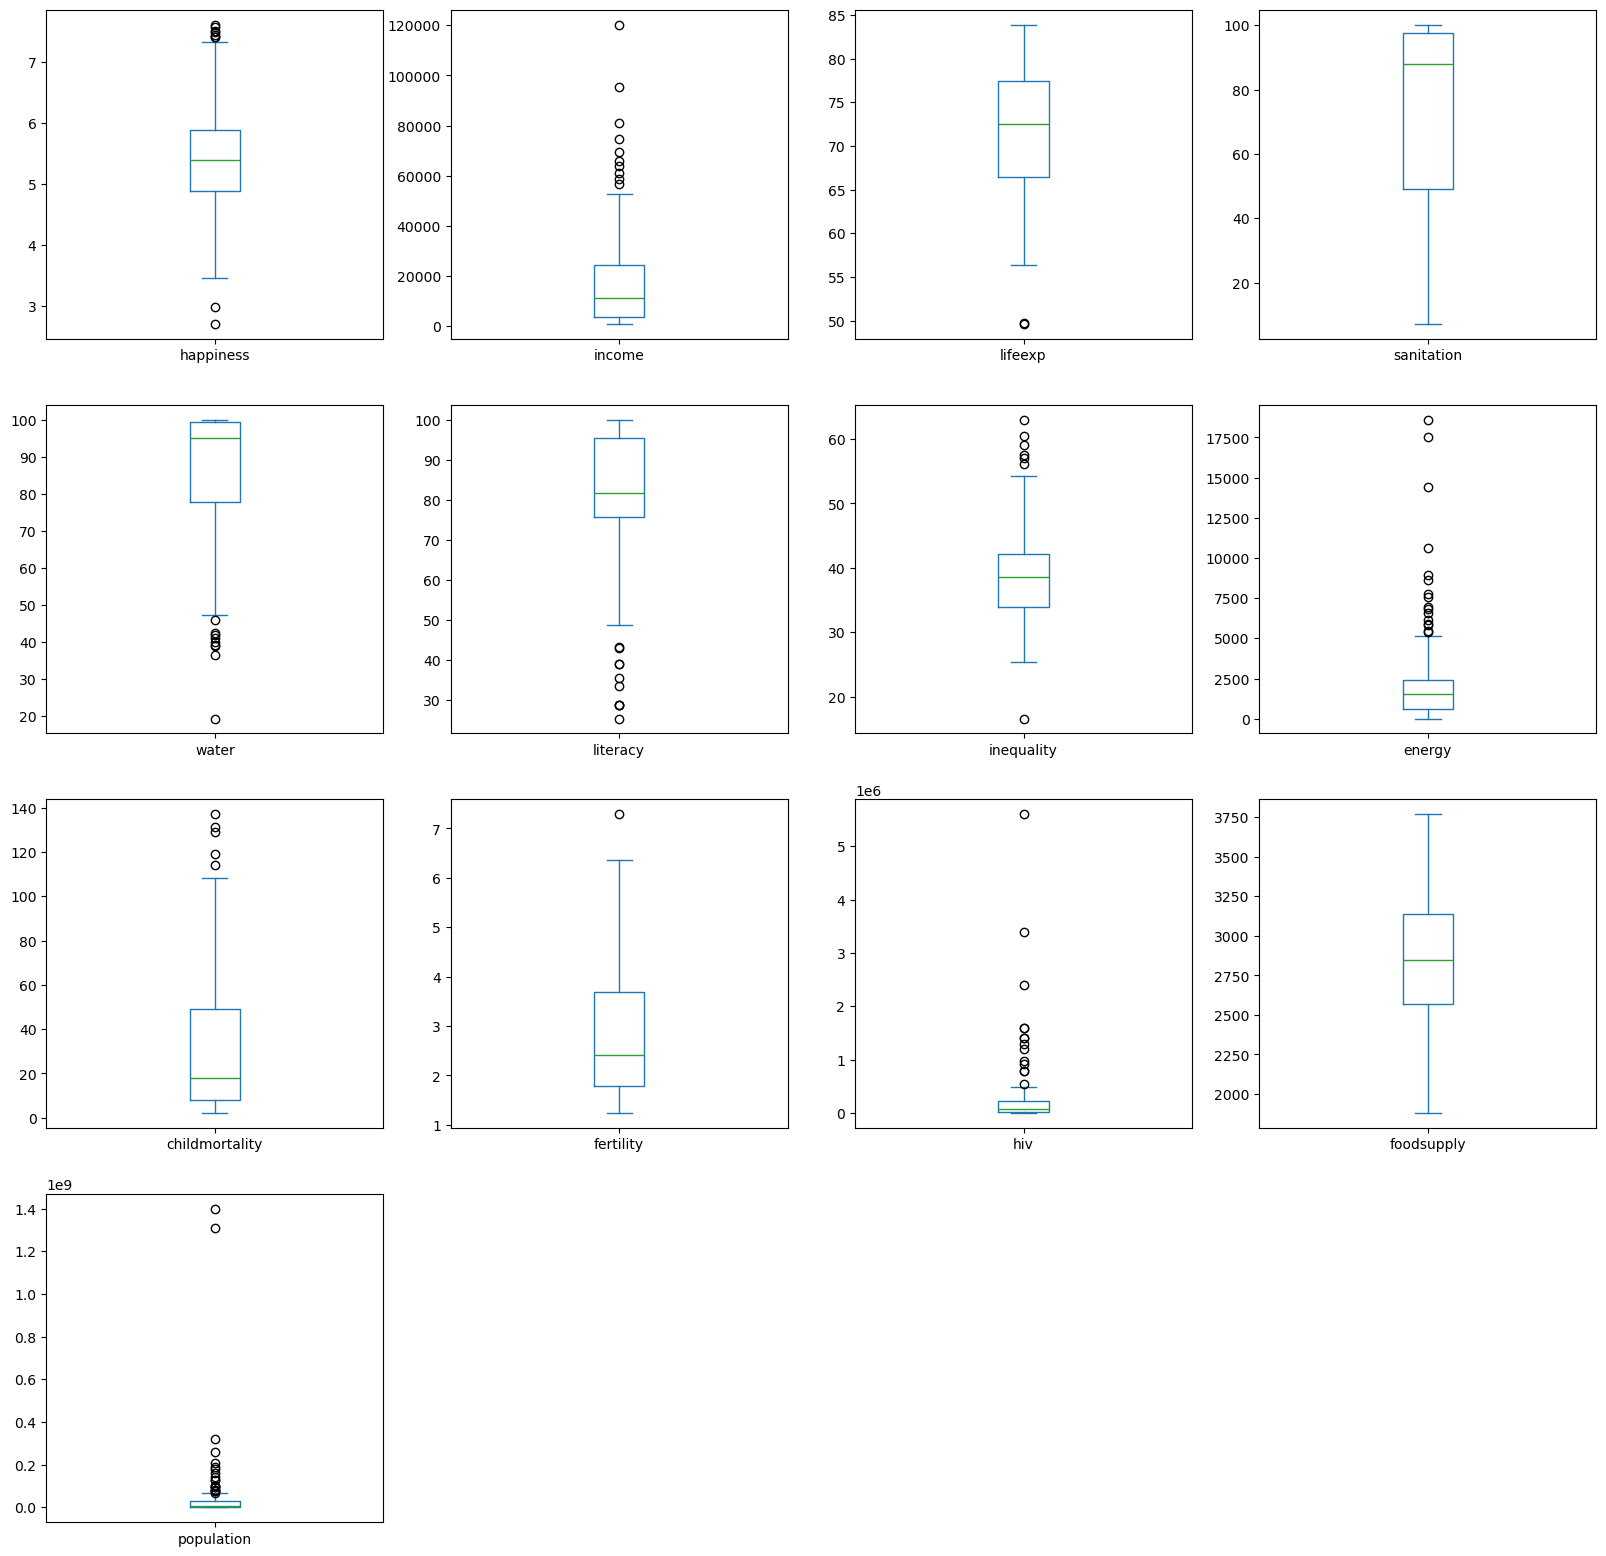

In [14]:
boxPlotAll(dataset)

# Prepare the data

In [15]:
dataset = appendEqualCountsClass(dataset,class_name="lifeexp_band",feature="lifeexp",num_bins=3, labels=["L","M", "H"])

In [16]:
dataset["lifeexp_band"].value_counts()

lifeexp_band
L    65
H    65
M    64
Name: count, dtype: int64

In [17]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

In [18]:
y = dataset["lifeexp_band"]
X = dataset[['happiness', 'income', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population']]

### SCaling the data (normalize) 

In [19]:
scaler = MinMaxScaler()
rescaled_X = scaler.fit_transform(X)

X = pd.DataFrame(rescaled_X, columns=X.columns)

In [20]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the testset and trainset 

In [21]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=test_size, random_state=seed)

### Model

In [22]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
model_lr = LogisticRegression(solver="lbfgs",multi_class="auto")
model_lr.fit(X, y)

/home/anjara/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

# Check the model

In [24]:
# DecisionTreeClassifier
predict_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier : ", accuracy_score(Y_train, predict_dt))

DecisionTreeClassifier :  1.0


In [25]:
# LogisticRegression
predict_lr = model_lr.predict(X_train)
print("LogisticReression : ", accuracy_score(Y_train, predict_lr))

LogisticReression :  0.7984496124031008


# Evaluate the model

In [26]:
prediction_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier : ", accuracy_score(Y_test, prediction_dt))

DecisionTreeClassifier :  0.676923076923077


In [27]:
prediction_lr = model_lr.predict(X_test)
print("LogisticRegression : " ,accuracy_score(Y_test, prediction_lr))

LogisticRegression :  0.7692307692307693


In [28]:
model = model_lr
print("Final model: LogisticRegression")

Final model: LogisticRegression


# Inspect the model

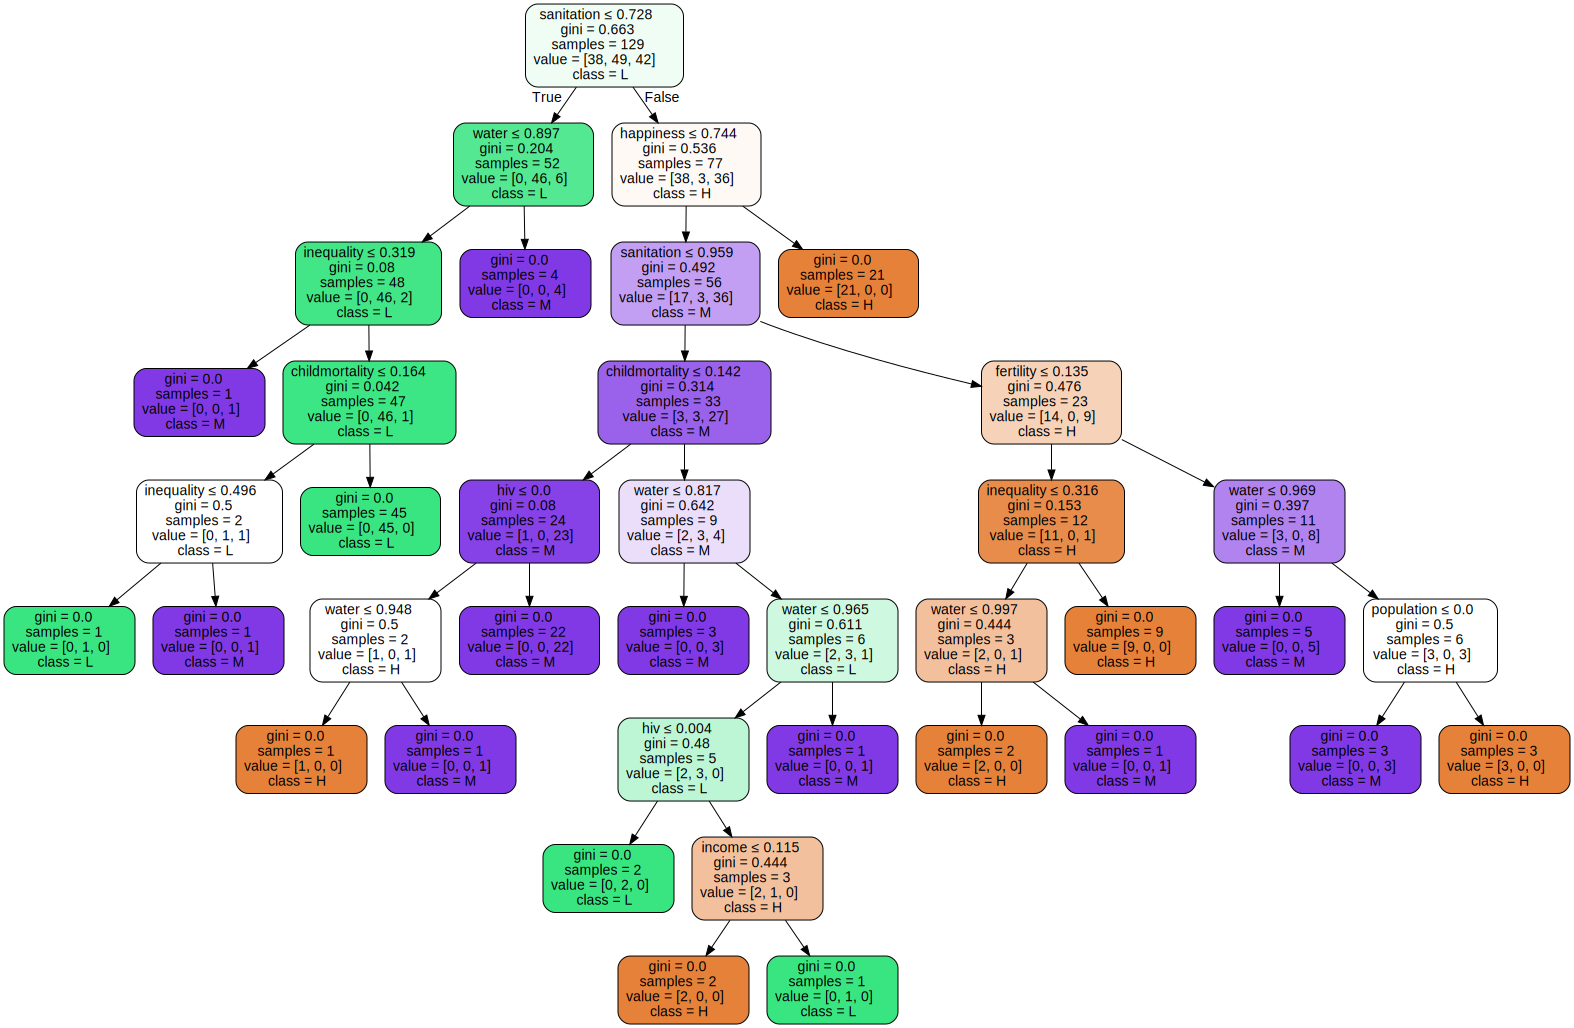

In [29]:
viewDecisionTree(model_dt, X.columns)

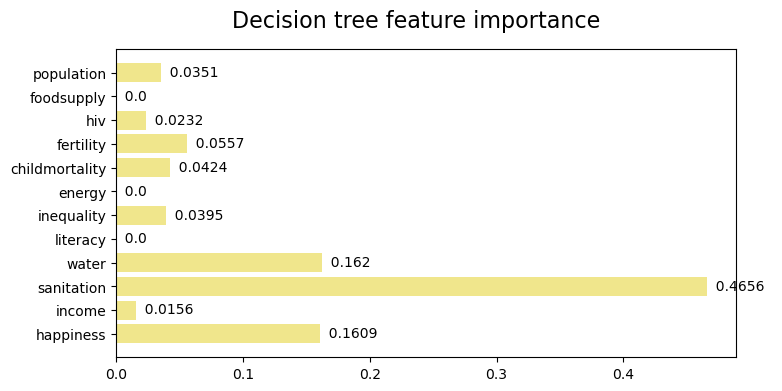

In [30]:
decisionTreeSummary(model_dt, X.columns)

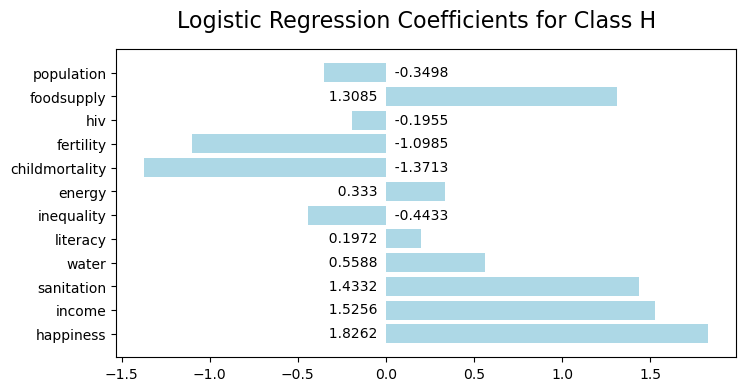

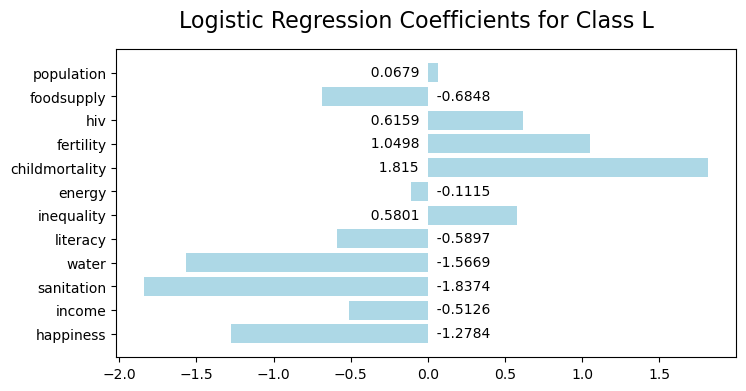

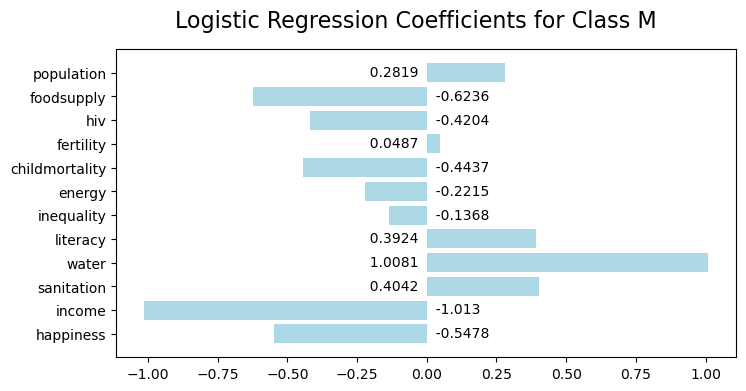

In [31]:
logisticRegressionSummary(model_lr, X.columns)